<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Analysis of tags and quality of questions posted on Stack Overflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate</p>

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Analysing the most demanding question topic asked on stack overfllow.<br>
2. Low quality questions analysis and differentiate it with high quality questions

<h3>Data Field Explaination</h3>
This dataset has 45,295 rows and 6 columns<br>
<u style="font-weight:bold;">Id</u>(integer) - id of the question asked.<br>
<u style="font-weight:bold;">Title</u>(string) - Discreption of questions.<br>
<u style="font-weight:bold;">Body</u>(string) - Content of questions.<br>
<u style="font-weight:bold;">Tags</u>(string) - languages and concepts used in the questions.<br>
<u style="font-weight:bold;">CreationDate</u>(string) - date of creation of the questions.<br>
<u style="font-weight:bold;">Quality</u>(string) - quality of the questions.

<h3>Dataset classification</h3>
Questions are classified into three categories:<br><br>
1. <b>HQ:</b>High-quality posts without a single edit.<br>
2. <b>LQ_EDIT:</b> Low-quality posts with a negative score, and multiple community edits. However, they still remain open after those changes.<br>
3. <b>LQ_CLOSE:</b> Low-quality posts that were closed by the community without a single edit.

In [84]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [4]:
#Read the dataset
df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
#Calculate shape of dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (45000, 6)


In [6]:
#Get attribute informations like total null,non-null values, data-type of each attribute. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45000 non-null  int64 
 1   title         45000 non-null  object
 2   body          45000 non-null  object
 3   tags          45000 non-null  object
 4   creationdate  45000 non-null  object
 5   y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [101]:
df.describe()

,id,tag_count,body_len,title_len
count,4.500000e+04,45000.000000,45000.000000,45000.000000
mean,4.575616e+07,2.653889,1003.785689,53.779689
std,7.120035e+06,1.204084,1550.689681,22.156292
min,3.455266e+07,1.000000,33.000000,15.000000
25%,3.973593e+07,2.000000,332.000000,38.000000
50%,4.503563e+07,3.000000,595.000000,50.000000
75%,5.125584e+07,3.000000,1103.000000,65.000000
max,6.046802e+07,6.000000,36721.000000,150.000000


In [7]:
df.head()

,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [8]:
#Replacing angular brackets in 'Tags' column value with spaces.
df['tags'] = df['tags'].str.replace('>',' ')
df['tags'] = df['tags'].str.replace('<','')

In [9]:
df.head()

,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button,2016-01-01 05:21:48,HQ


In [11]:
#Calculate total number of tags present in each data-point.
df["tag_count"] = df["tags"].apply(lambda text: len(text.split(" "))-1)
df.head()

,id,title,body,tags,creationdate,y,tag_count
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2016-01-01 00:21:59,LQ_CLOSE,2
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2016-01-01 02:03:20,HQ,2
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ,5
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ,5
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button,2016-01-01 05:21:48,HQ,3


In [13]:
#Distribution of number of tags per question
df.tag_count.value_counts()

2    13759
3    11940
1     8410
4     6779
5     4111
6        1
Name: tag_count, dtype: int64

In [26]:
print( "Maximum number of tags per question: %d"%max(df.tag_count))
print( "Minimum number of tags per question: %d"%min(df.tag_count))
print( "Avg. number of tags per question: %f"% ((sum(df.tag_count)*1.0)/len(df.tag_count)))

Maximum number of tags per question: 6
Minimum number of tags per question: 1
Avg. number of tags per question: 2.653889


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


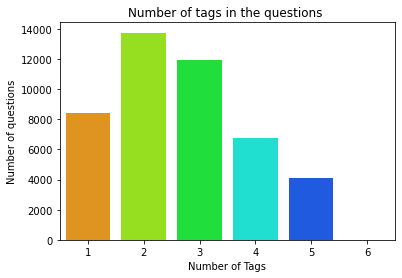

In [27]:
sns.countplot(df.tag_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<h3>Observation</h3>
1. Maximum number of tags per question: 6<br>
2. Minimum number of tags per question: 1<br>
3. Avg. number of tags per question: 2.653889<br>
4. Most of the questions are having 2,3 and 1 tags.

In [86]:
#Calculating frequency of each tag by using CountVectorizor function.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df['tags'])

In [87]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 45000
Number of unique tags : 9336


In [96]:
#Lets now store the document term matrix in a dictionary.
tags = vectorizer.get_feature_names()
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [97]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict.csv'):
    with open('tag_counts_dict.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key,value in result.items():
            writer.writerow([key, value])


In [98]:
tag_df = pd.read_csv("tag_counts_dict.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.class-file,3
1,.d.ts,1
2,.htaccess,29
3,.net,433
4,.net-1.1,1


In [81]:
#Sorting according to count of tags.
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False,ignore_index=True)
tag_counts = tag_df_sorted['Counts'].values

<h2> Top 20 tags based on frequency</h2>

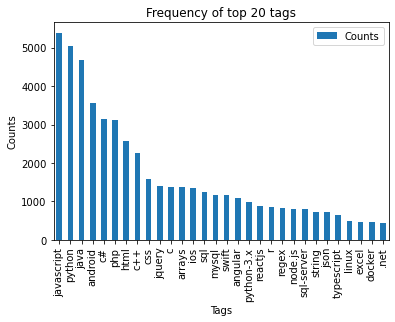

In [89]:
#Showing top 20 tags
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
lst=list(tag_df_sorted['Tags'].head(30))
plt.xticks(i,lst,rotation='vertical')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

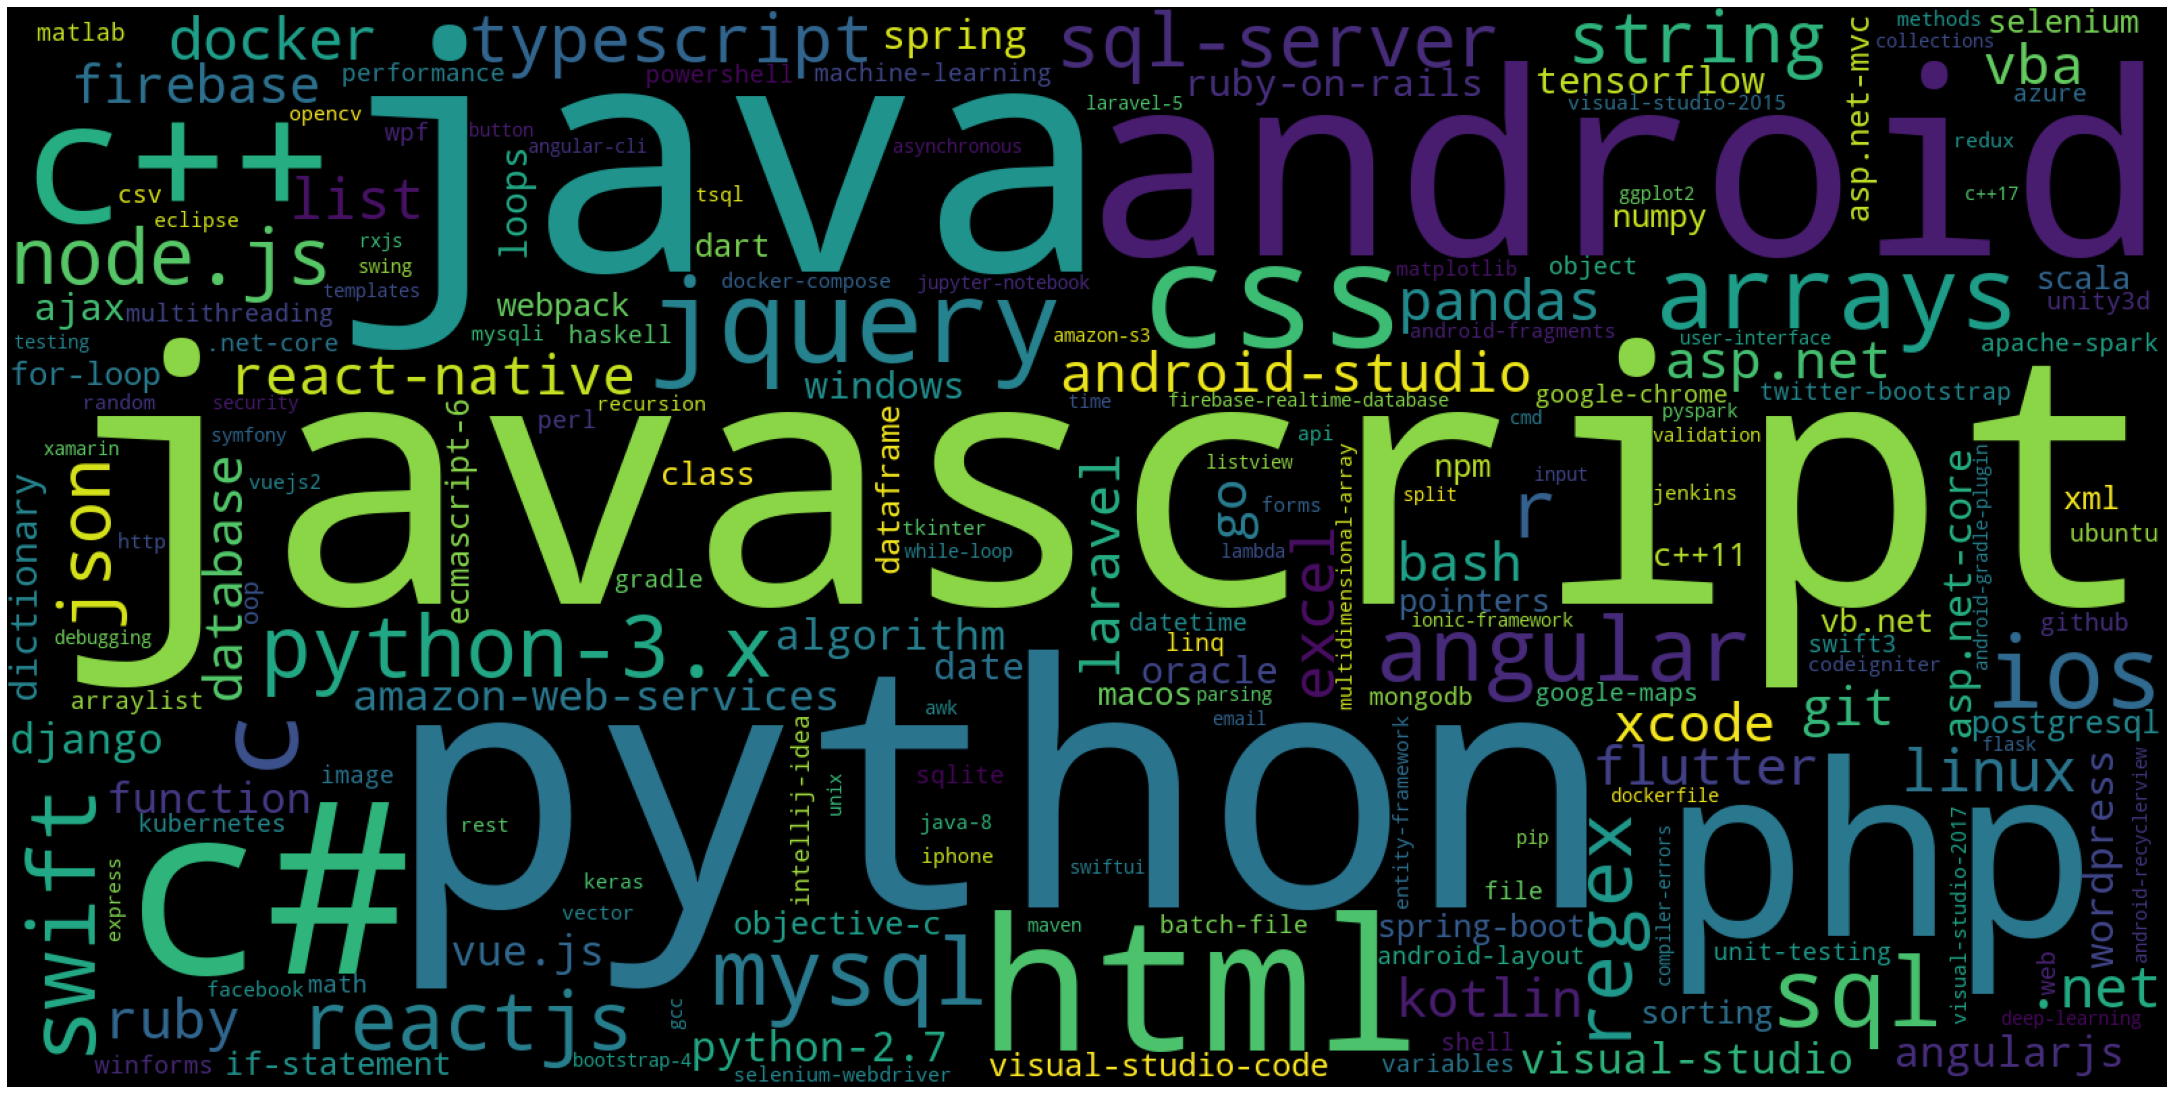

In [85]:
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<h3> Observation</h3>
By looking both wordcloud and bar plot we can say Javascript is appearing most of the time then python,java,c# appeared most as tags.

In [45]:
df.y.value_counts()[:]

LQ_EDIT     15000
HQ          15000
LQ_CLOSE    15000
Name: y, dtype: int64

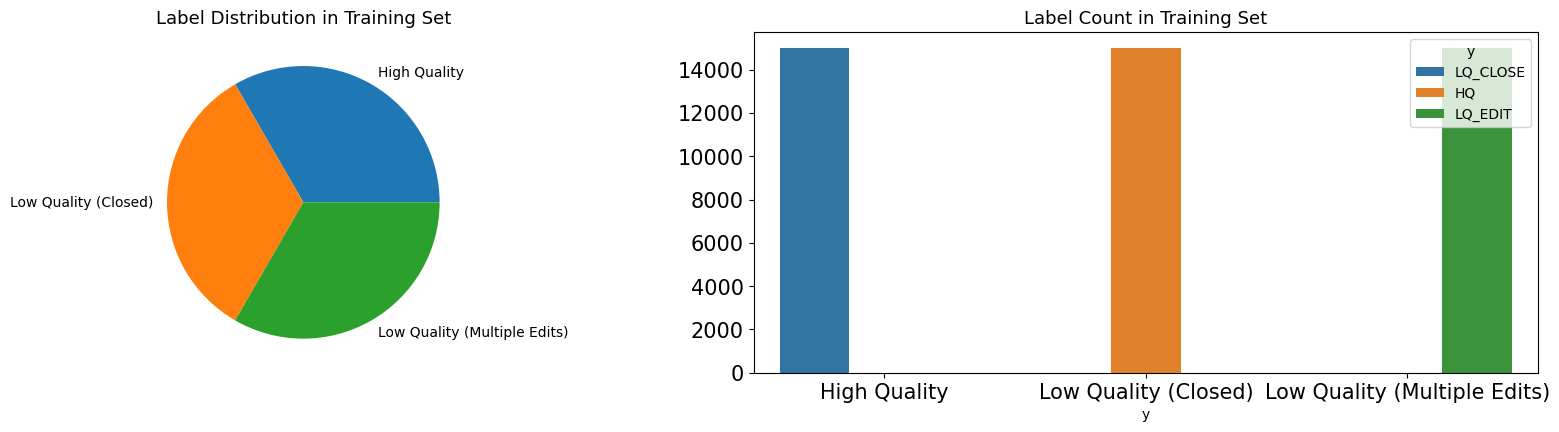

In [100]:
fig, axes = plt.subplots(ncols = 2, figsize = (17, 4), dpi = 100)
plt.tight_layout()

df.groupby('y').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
sns.countplot(x = df['y'], hue = df['y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

<h3> Observation</h3>
All class labels are evenly present in dataset.

In [91]:
def get_class_feature(df, cls, feature):
    """
    Extract featuers by class
    Returns new dataframe with respective class
    """
    return df.loc[df['y'] == cls, feature]

In [92]:
df['title_len'] = df.title.apply(len)
lq_close = get_class_feature(df, 'LQ_CLOSE', 'title_len')
lq_edit = get_class_feature(df, 'LQ_EDIT', 'title_len')
hq = get_class_feature(df, 'HQ', 'title_len')

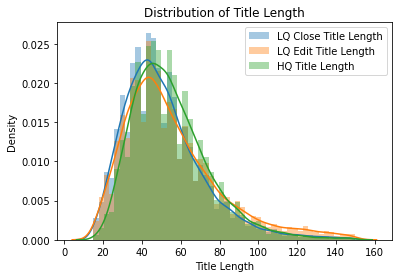

In [93]:
sns.distplot(lq_close, label='LQ Close Title Length')
sns.distplot(lq_edit, label='LQ Edit Title Length')
sns.distplot(hq, label='HQ Title Length')
plt.title('Distribution of Title Length')
plt.ylabel('Density')
plt.xlabel('Title Length')
plt.legend()
plt.show()

<h3>Observation</h3>
Most of the questions have 25 to 60 length title.

In [94]:
df['body_len'] = df.body.apply(len)
lq_close = get_class_feature(df, 'LQ_CLOSE', 'body_len')
lq_edit = get_class_feature(df, 'LQ_EDIT', 'body_len')
hq = get_class_feature(df, 'HQ', 'body_len')

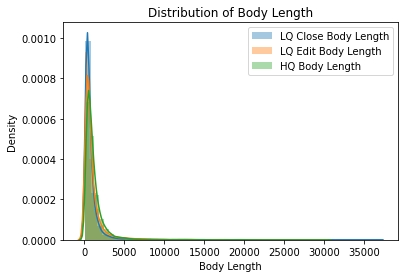

In [95]:
sns.distplot(lq_close, label='LQ Close Body Length')
sns.distplot(lq_edit, label='LQ Edit Body Length')
sns.distplot(hq, label='HQ Body Length')
plt.title('Distribution of Body Length')
plt.ylabel('Density')
plt.xlabel('Body Length')
plt.legend();